In [1]:
import os
import csv
import math
from math import*
import numpy as np
import pandas as pd
from scipy import stats
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def dataset_daily():
    #za sekoe domakjinstvo dnevni statistiki
    """
    :returns:
    :rtype: 
    
    """
    households_data = []
    
    folder = r'./data/daily_dataset/'
    for root, dirs, files in os.walk(folder):
        for f in files: 
            name = folder+f
            df = pd.read_csv(name)
            households_data.append(df)
    return households_data

In [3]:
def plot_households_data(dataset):
        
    """
    :returns:
    :rtype: 
    
    """
    #ova e toa shto gi crta sekoe domakjinstvo kolku troshi  (od vkupnite podatoci)
    for i in range(len(dataset)):
        block_data = dataset[i]['energy_sum']
        block_data=list(block_data)
        plt.plot(block_data, label=('block_'+str(i)))

    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [4]:
def plot_one_household(df):

        
    """
    :returns:
    :rtype: 
    
    """

    plt.plot(df, label=('block_'+str(i)))

    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [5]:
def plot_daily_data(dataset):
        
    """
    :returns:
    :rtype: 
    
    """
    #dneven izveshtaj
    #dataset -> new_df['energy(kWh/hh)']
    energy=[]
    for i in dataset:
        energy = [float(a) for a in i if a!='Null']
        plt.ylim(0, 8.0)
        plt.plot(energy)
    plt.show()

In [6]:
def dataset_half_hourly():
    
    """
    :returns:
    :rtype: 
    """
    #go vchituva mnzohestvoto shto sodrzhi podatoci za sekoj pola saat kolku e energy consumption
    households_data = []
    folder = r'./data/halfhourly_dataset/'
    for root, dirs, files in os.walk(folder):
        for f in files: 
            name = folder+f
            df = pd.read_csv(name, low_memory=False)
            households_data.append(df)
        return households_data

In [7]:
def preprocess_df(df):
        
    """
    :returns:
    :rtype: 
    
    """
    df = df.drop_duplicates(['tstp'])
    df[['Year','Month', 'Day']] = df.tstp.str.split("-",expand=True,)
    df[['Day', 'Time']] = df.Day.str.split(" ",expand=True,)
    df['energy(kWh/hh)'] = df.groupby(['Year', 'Month', 'Day'])['energy(kWh/hh)'].transform(lambda x : [x.tolist()]*len(x))
    df = df.drop_duplicates(['Year', 'Month', 'Day'])
    energy=[]
    new_column=[]
    for i in df['energy(kWh/hh)']:
        energy = [float(a) for a in i if a!='Null']
        new_column.append(energy)
        energy=[]
    df['Energy'] = new_column
    return df

In [8]:
def list_averaging(data):
    averaged_hourly = []
    for i in range(0,48):
        avg=0
        for day in data:
            if(len(day))==48:
                avg+=day[i]
        averaged_hourly.append(avg/len(data))
        avg=0
    return averaged_hourly

In [9]:
def optimal_number_of_clusters(dataset):
    
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0).fit(averaged)
        sse.append(kmeans.inertia_)
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    
    kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )

    return kl.elbow

In [10]:
def clustering_model(dataset, n):
    kmeans = KMeans(n_clusters=n, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0).fit(dataset)
    return kmeans.labels_

In [11]:
def show_clusters(labels, values):
    num_of_clusters = len(set(labels))
    for cluster in range(0, num_of_clusters):
        indices=[]
        for i in range(len(labels)):
            if labels[i]==cluster:
                indices.append(i)
        for index in indices:
            #plt.ylim(0, 2.6)
            plt.plot(values[index])
        plt.show()
        indices=[]

In [12]:
def customer_behaviour(labels, values):
    num_of_clusters = len(set(labels))
    for cluster in range(0, num_of_clusters):
        #indices=[]
        new_list=[]
        for i in range(len(labels)):
            if labels[i]==cluster: #dali e toj klaster?
                #indices.append(i) 
                new_list.append(values[i]) #ako e stavi gi tie
        plt.ylim(0, 2.0)
        plt.plot(list_averaging(new_list))
        plt.show()
        #indices=[]
        new_list=[]

In [13]:
def get_seasons_dataset(dataset):
    
    winter_dataset=[]
    summer_dataset=[]
    
    for df in dataset:
        grouped = df.groupby(df.Month)
        
        summer_df = grouped.get_group('04')
        for i in range(5,10):
            summer_df=summer_df.append(grouped.get_group(f'0{i}'))
        summer_dataset.append(summer_df)
            
        winter_df = grouped.get_group('10')
        for i in ['11','12','01','02','03']:
            winter_df=winter_df.append(grouped.get_group(i))
        winter_dataset.append(winter_df)

    return winter_dataset, summer_dataset

In [14]:
dataset_half_hourly = dataset_half_hourly() 

In [15]:
preprocessed_half_hourly = []
for i in dataset_half_hourly:
    new_df = preprocess_df(i)
    preprocessed_half_hourly.append(new_df)

C:\Users\Tamara Ilieva\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-7-19da09e2aac8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy(kWh/hh)'] = df.groupby(['Year', 'Month', 'Day'])['energy(kWh/hh)'].transform(lambda x : [x.tolist()]*len(x))


In [16]:
#iscrtuva za sekoe domakjinstvo dneven behaviour
#for i in preprocessed_half_hourly:
    #plot_daily_data(i['energy(kWh/hh)'])

In [17]:
averaged = []
for i in preprocessed_half_hourly:
    averaged.append(list_averaging(i['Energy']))

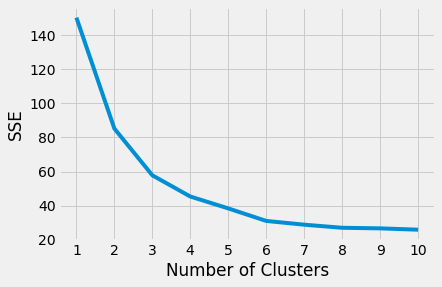

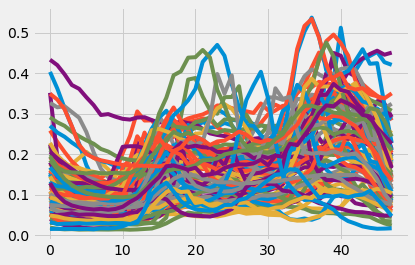

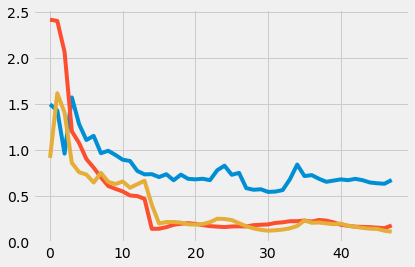

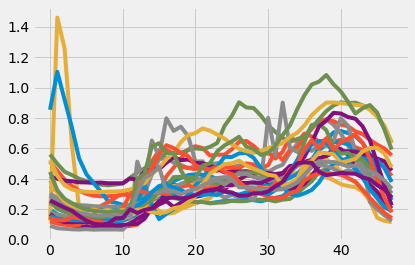

In [18]:
n = optimal_number_of_clusters(averaged)
labels = clustering_model(averaged, n)
show_clusters(labels, averaged)

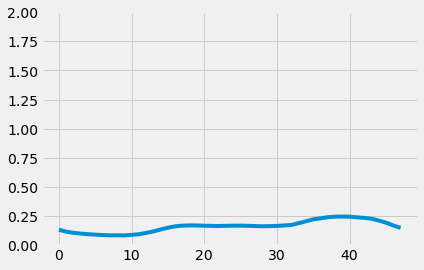

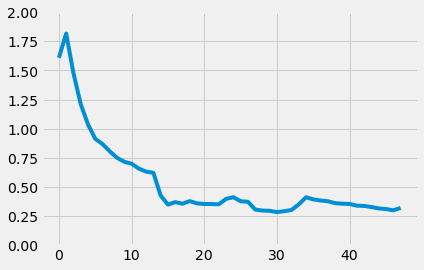

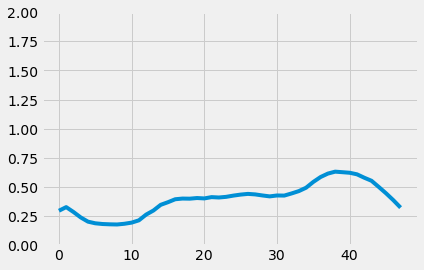

In [19]:
customer_behaviour(labels, averaged)

In [20]:
#print(list(preprocessed_half_hourly[0].sort_values(['Year', 'Month', 'Day'], ascending=[True, True, True]).Year))
#list(preprocessed_half_hourly[0].Year)

In [21]:
winter, summer = get_seasons_dataset(preprocessed_half_hourly)

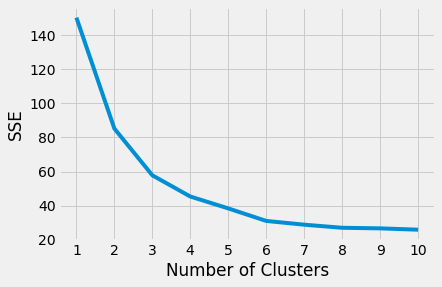

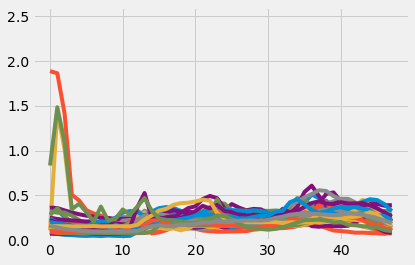

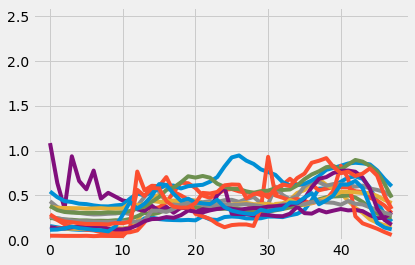

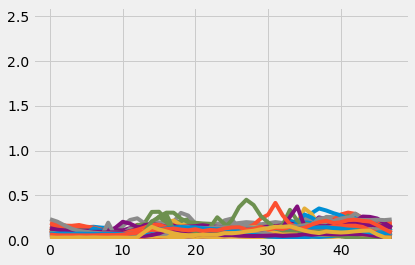

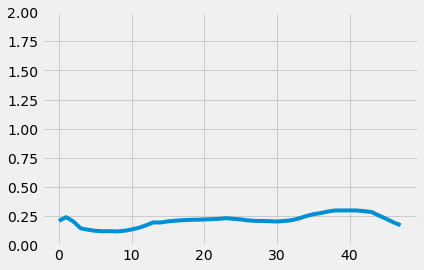

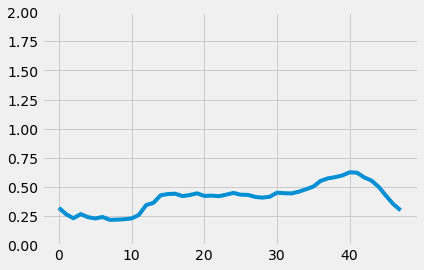

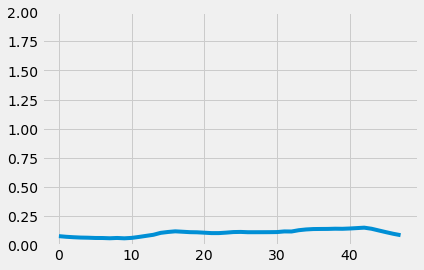

In [22]:
averaged_summer = []
for i in summer:
    averaged_summer.append(list_averaging(i['Energy']))
n = optimal_number_of_clusters(averaged_summer)
labels = clustering_model_half_hourly(averaged_summer, n)
show_clusters(labels, averaged_summer)
customer_behaviour(labels, averaged_summer)

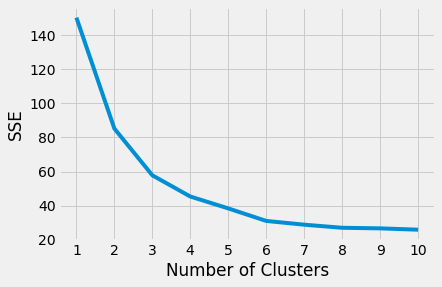

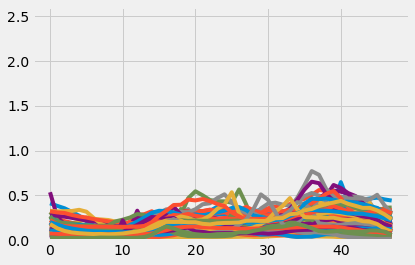

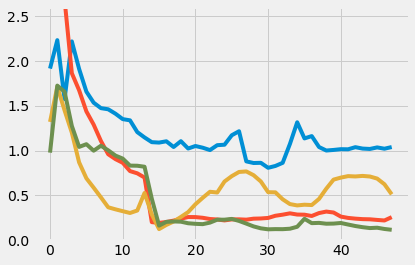

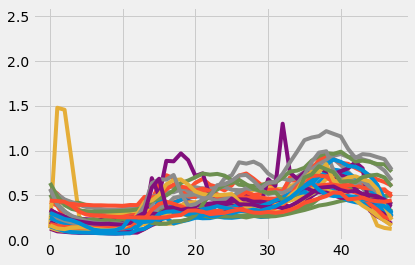

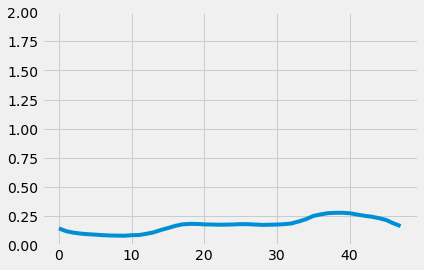

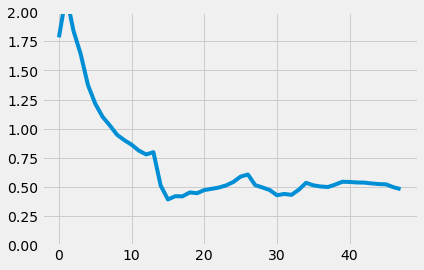

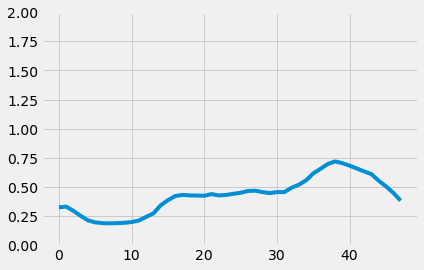

In [23]:
averaged_winter = []
for i in winter:
    averaged_winter.append(list_averaging(i['Energy']))
n = optimal_number_of_clusters(averaged_winter)
labels = clustering_model_half_hourly(averaged_winter, n)
show_clusters(labels, averaged_winter)
customer_behaviour(labels, averaged_winter)

=====
0


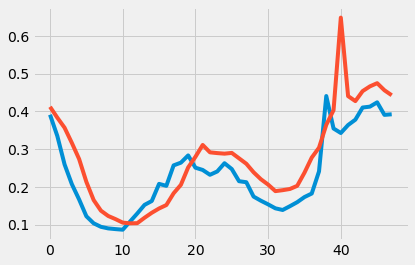

=====

=====
1


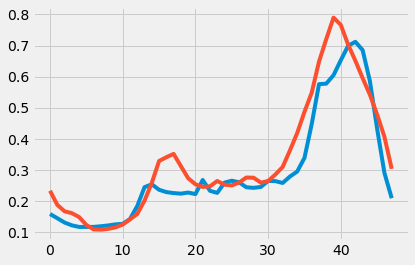

=====

=====
2


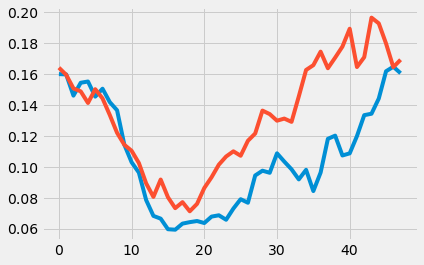

=====

=====
3


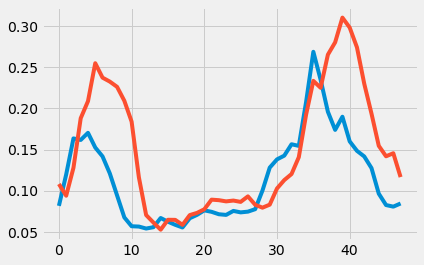

=====

=====
4


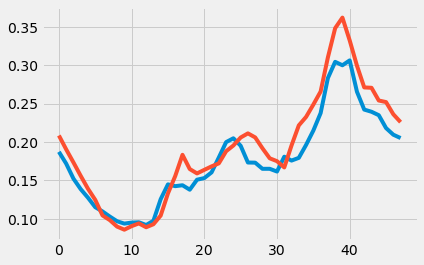

=====

=====
5


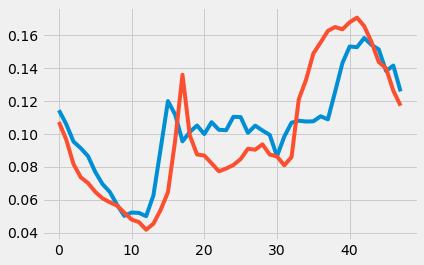

=====

=====
6


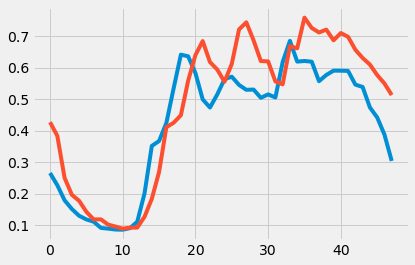

=====

=====
7


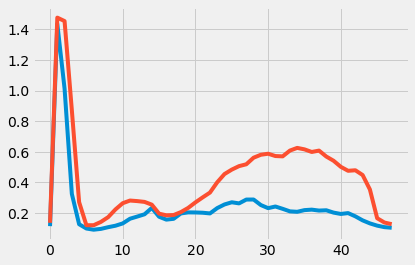

=====

=====
8


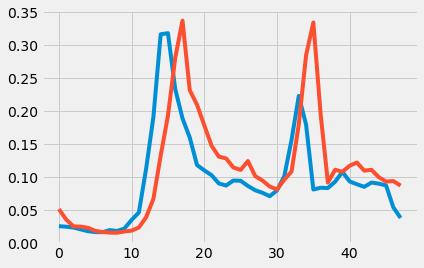

=====

=====
9


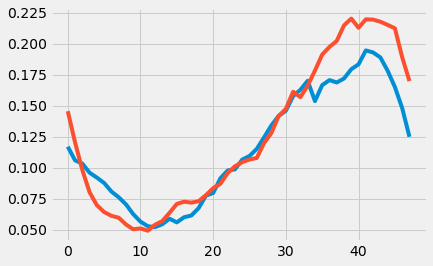

=====

=====
10


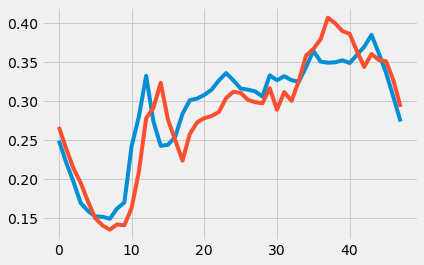

=====

=====
11


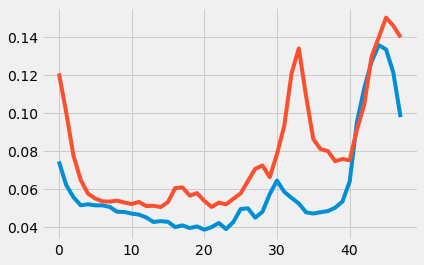

=====

=====
12


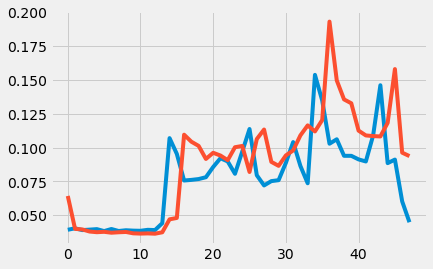

=====

=====
13


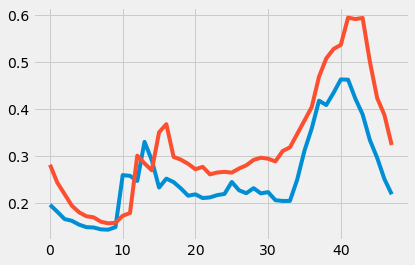

=====

=====
14


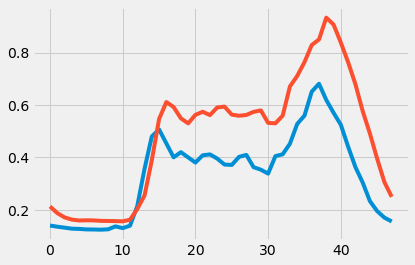

=====

=====
15


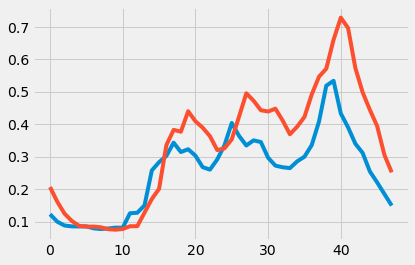

=====

=====
16


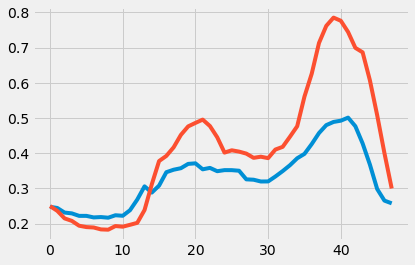

=====

=====
17


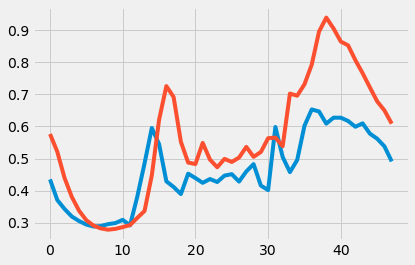

=====

=====
18


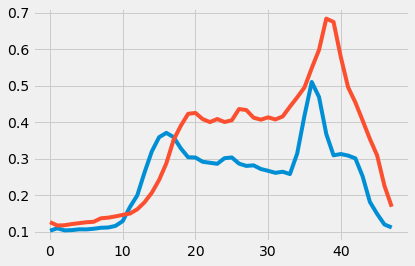

=====

=====
19


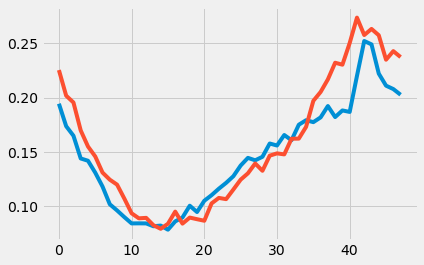

=====

=====
20


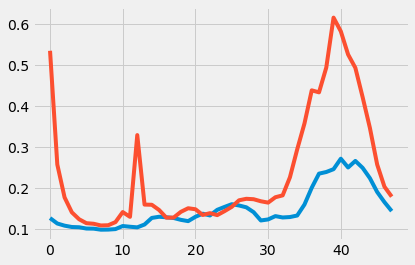

=====

=====
21


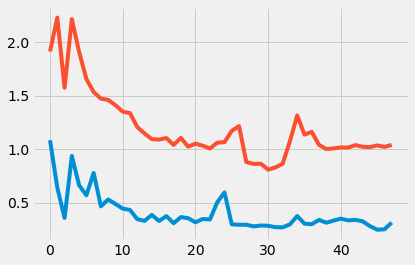

=====

=====
22


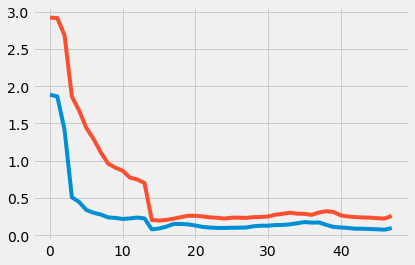

=====

=====
23


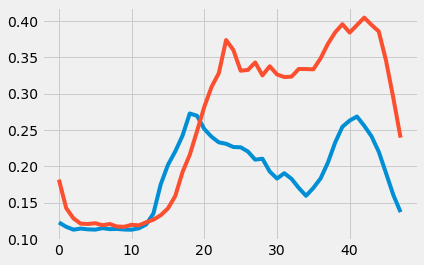

=====

=====
24


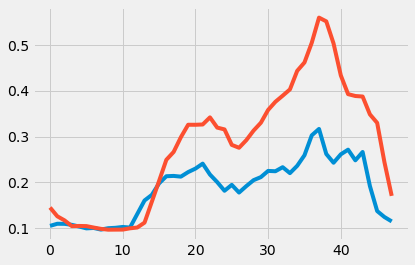

=====

=====
25


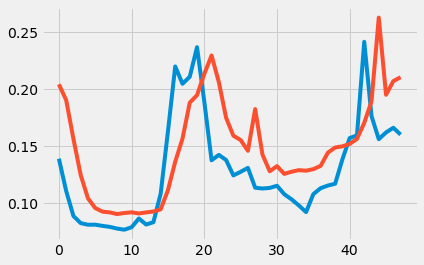

=====

=====
26


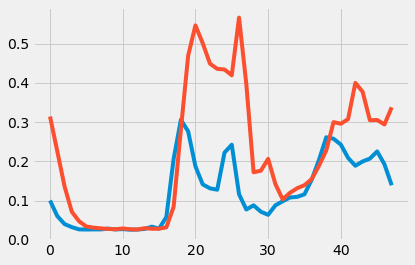

=====

=====
27


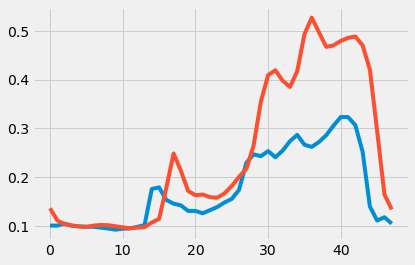

=====

=====
28


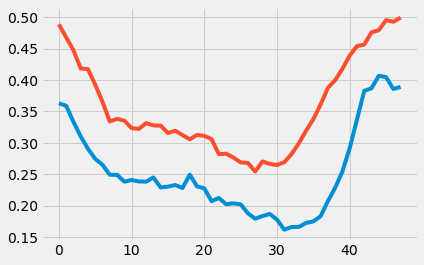

=====

=====
29


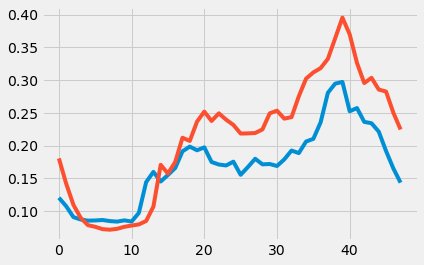

=====

=====
30


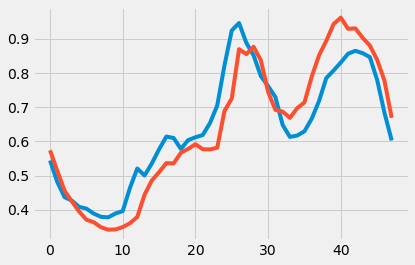

=====

=====
31


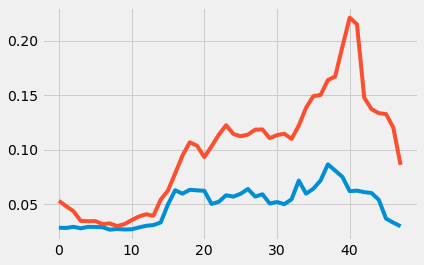

=====

=====
32


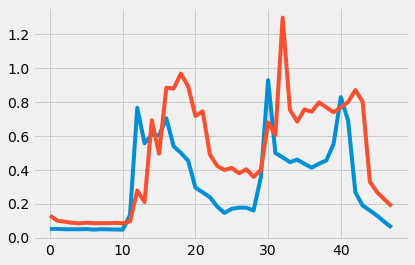

=====

=====
33


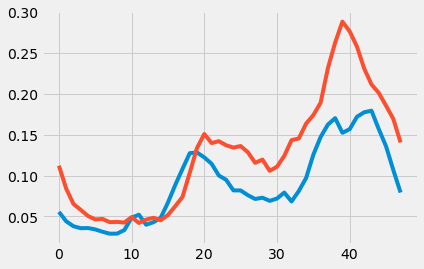

=====

=====
34


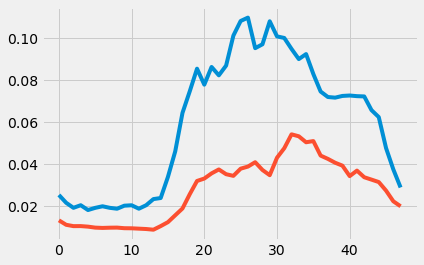

=====

=====
35


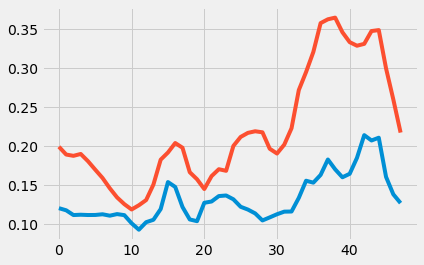

=====

=====
36


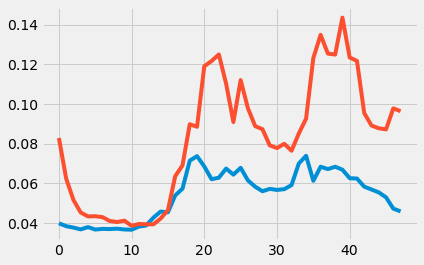

=====

=====
37


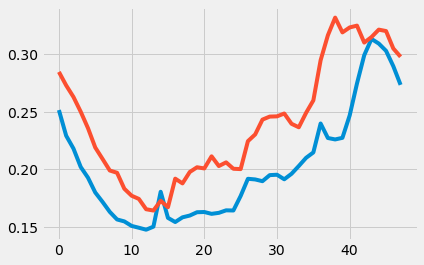

=====

=====
38


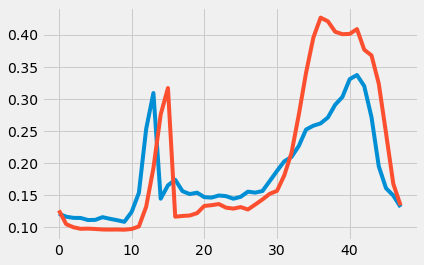

=====

=====
39


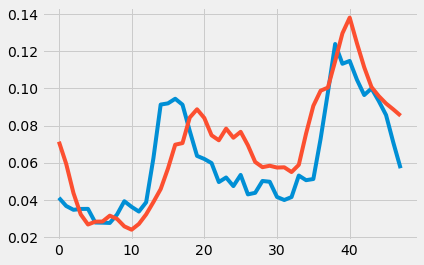

=====

=====
40


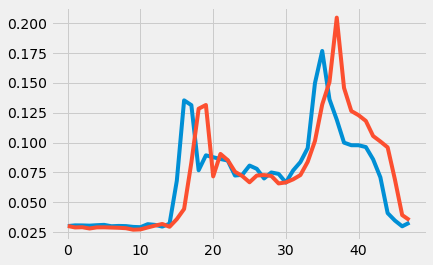

=====

=====
41


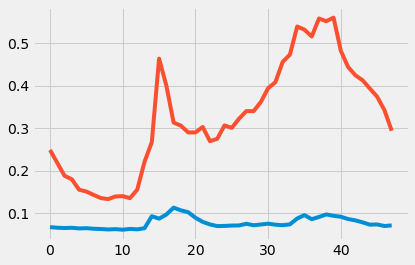

=====

=====
42


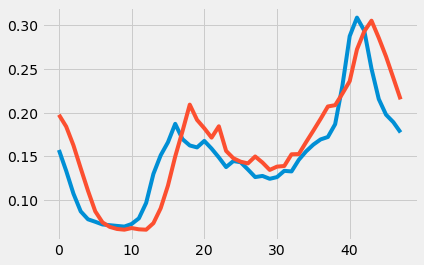

=====

=====
43


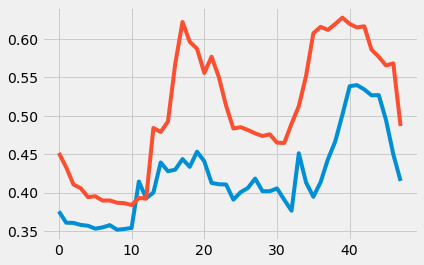

=====

=====
44


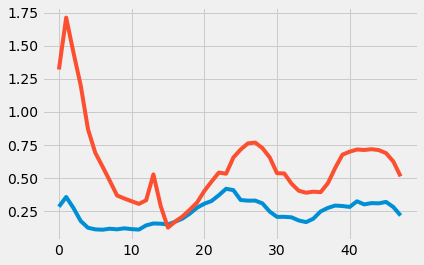

=====

=====
45


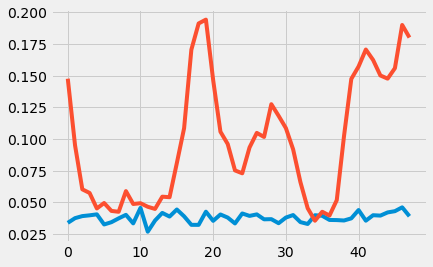

=====

=====
46


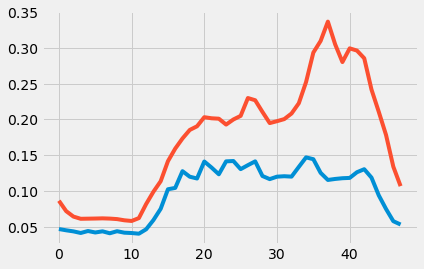

=====

=====
47


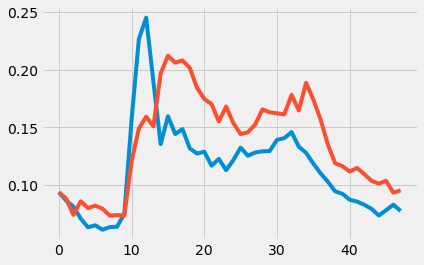

=====

=====
48


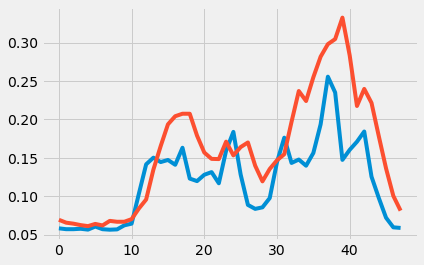

=====

=====
49


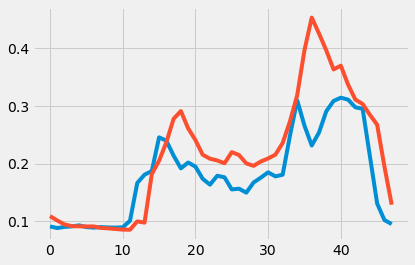

=====

=====
50


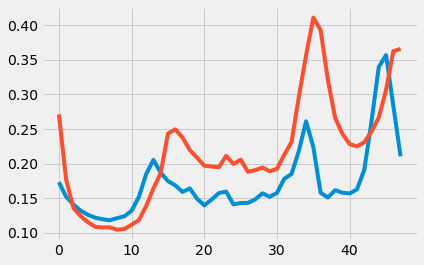

=====

=====
51


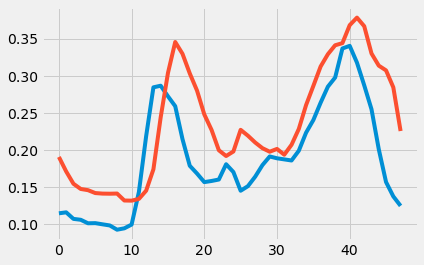

=====

=====
52


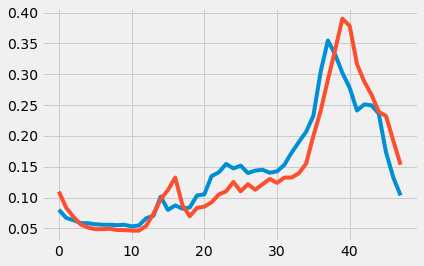

=====

=====
53


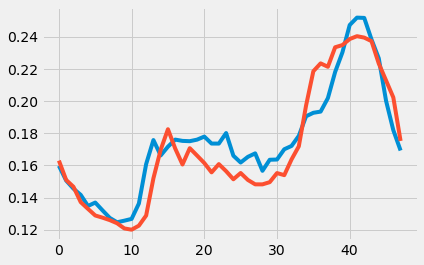

=====

=====
54


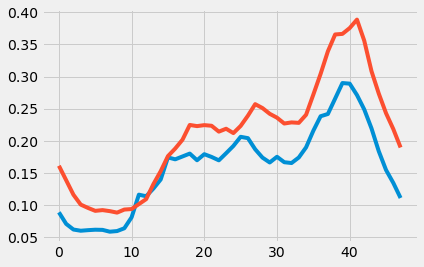

=====

=====
55


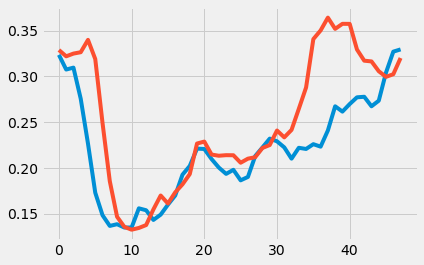

=====

=====
56


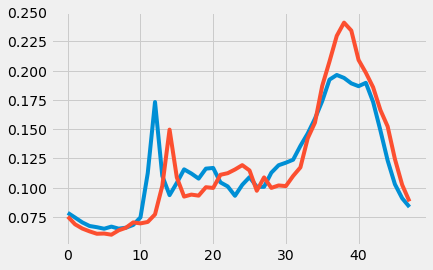

=====

=====
57


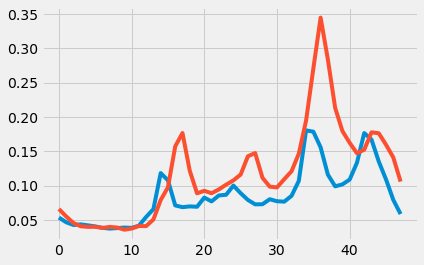

=====

=====
58


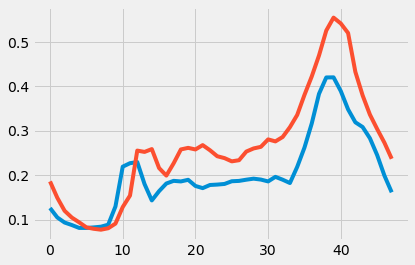

=====

=====
59


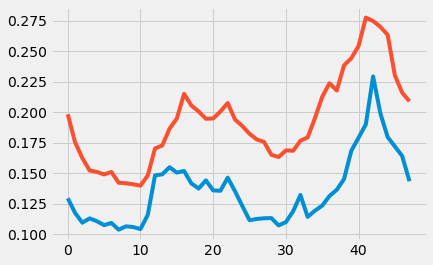

=====

=====
60


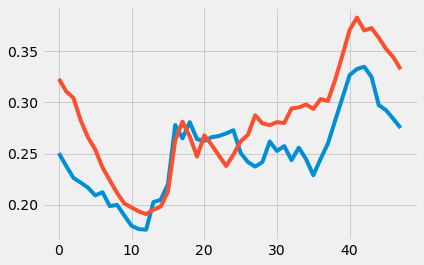

=====

=====
61


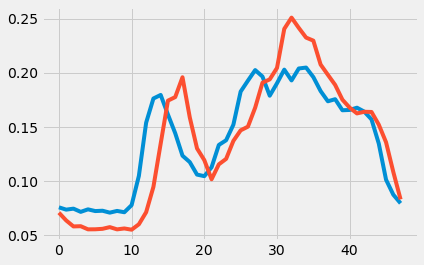

=====

=====
62


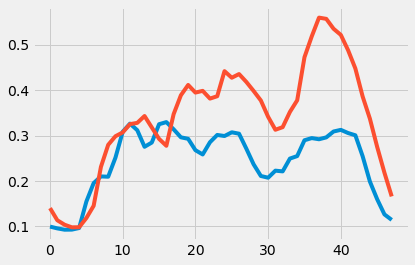

=====

=====
63


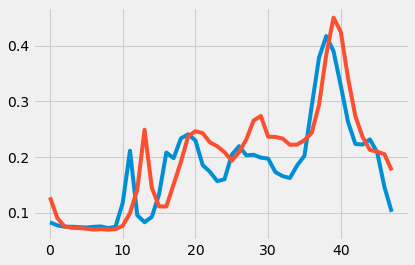

=====

=====
64


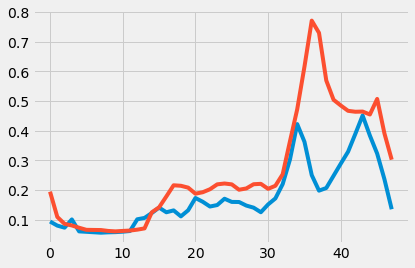

=====

=====
65


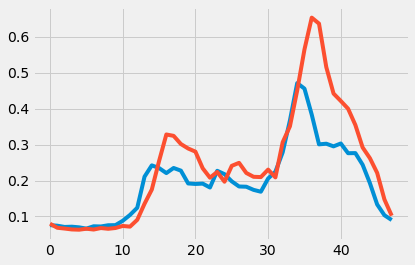

=====

=====
66


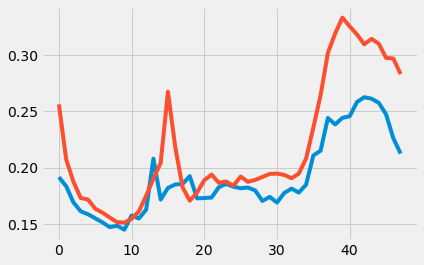

=====

=====
67


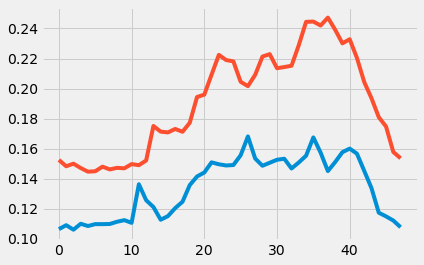

=====

=====
68


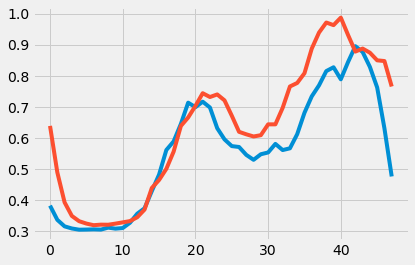

=====

=====
69


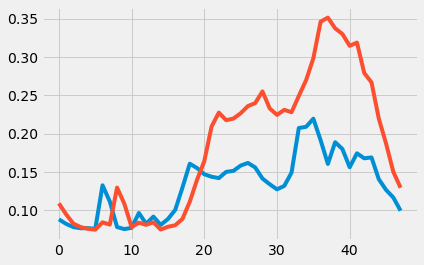

=====

=====
70


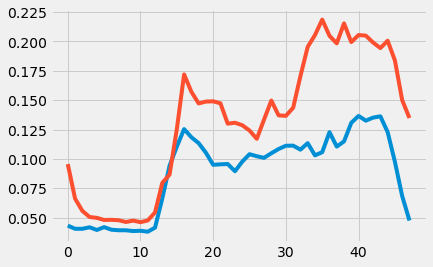

=====

=====
71


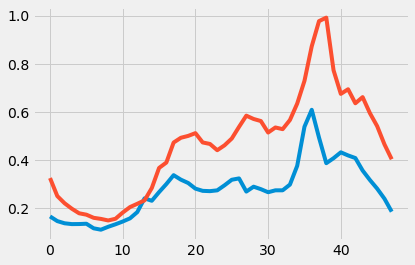

=====

=====
72


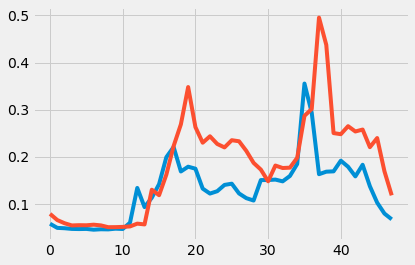

=====

=====
73


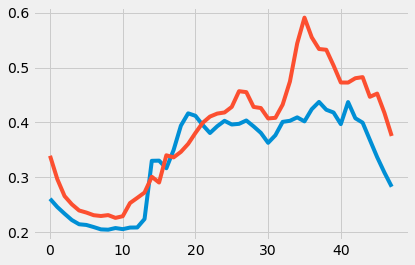

=====

=====
74


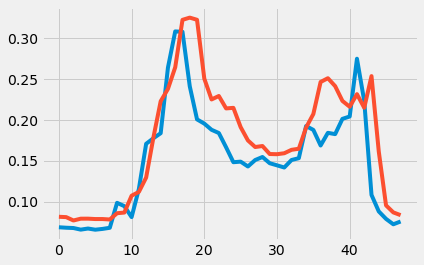

=====

=====
75


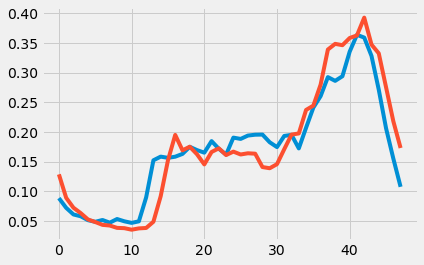

=====

=====
76


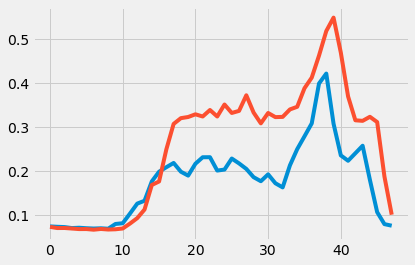

=====

=====
77


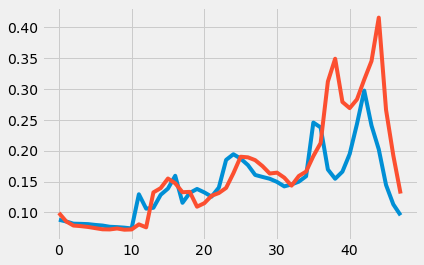

=====

=====
78


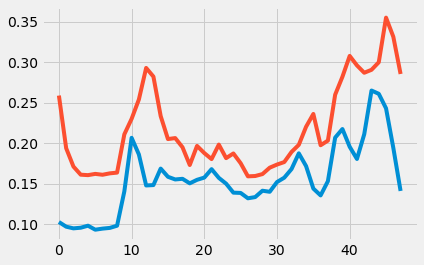

=====

=====
79


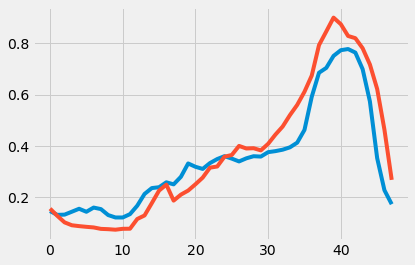

=====

=====
80


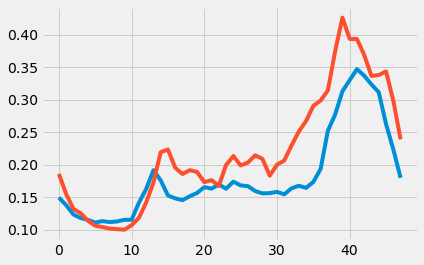

=====

=====
81


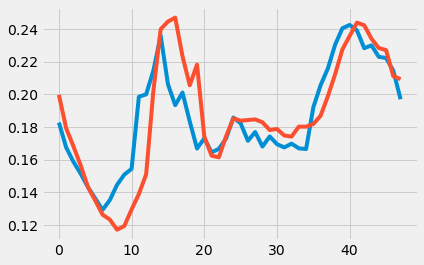

=====

=====
82


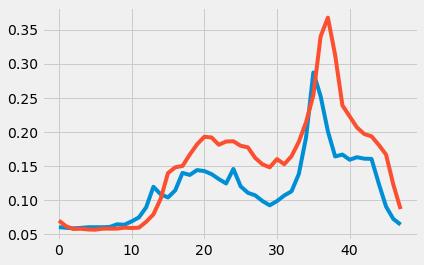

=====

=====
83


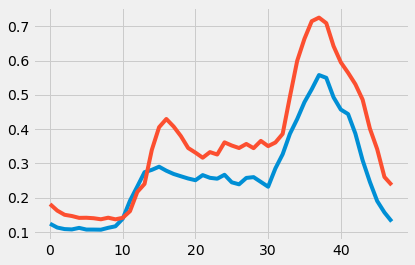

=====

=====
84


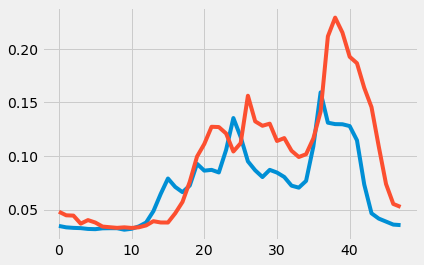

=====

=====
85


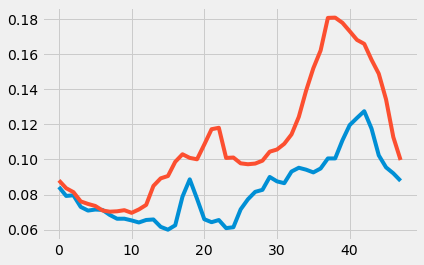

=====

=====
86


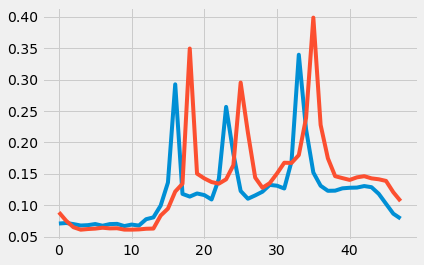

=====

=====
87


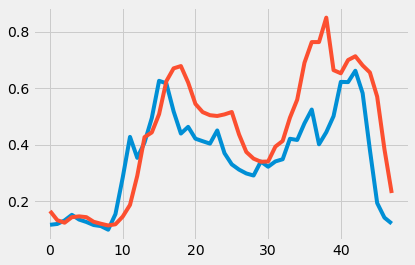

=====

=====
88


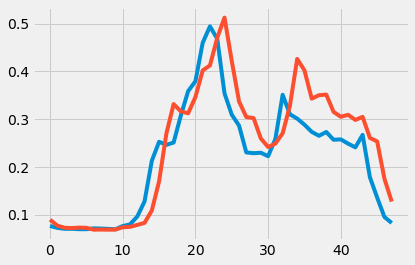

=====

=====
89


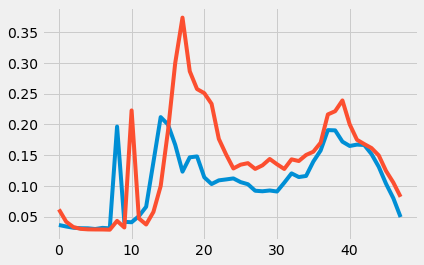

=====

=====
90


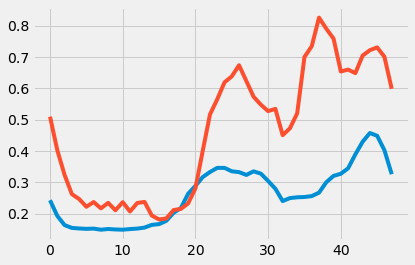

=====

=====
91


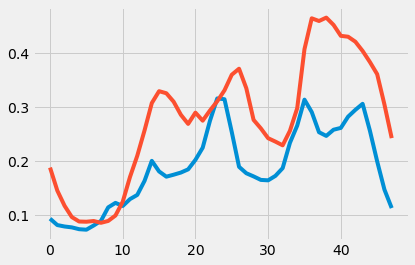

=====

=====
92


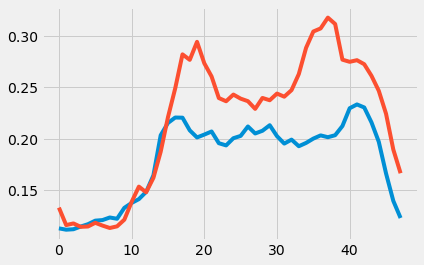

=====

=====
93


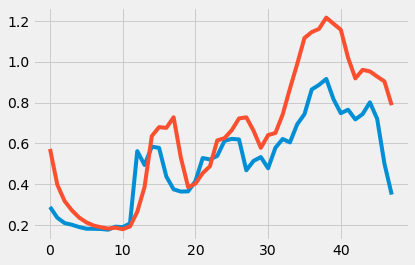

=====

=====
94


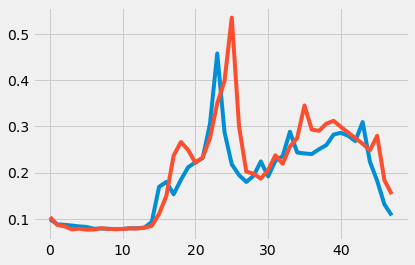

=====

=====
95


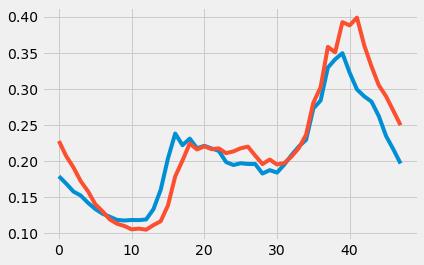

=====

=====
96


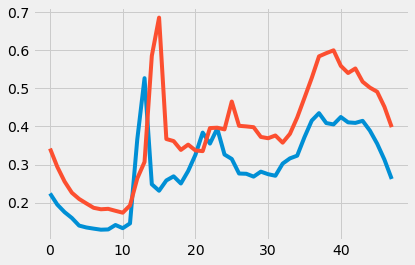

=====

=====
97


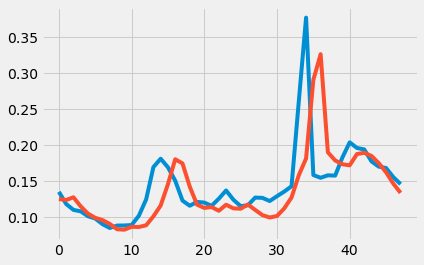

=====

=====
98


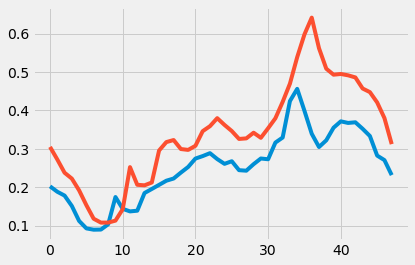

=====

=====
99


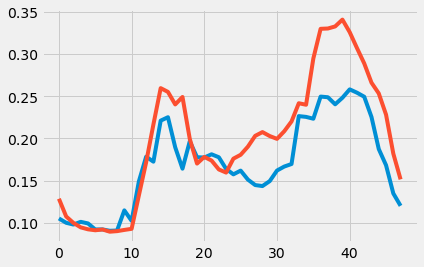

=====

=====
100


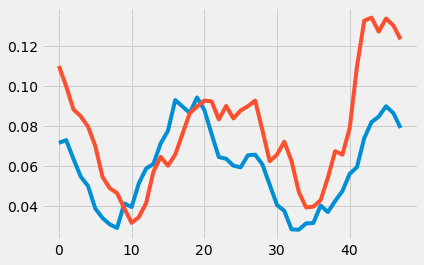

=====

=====
101


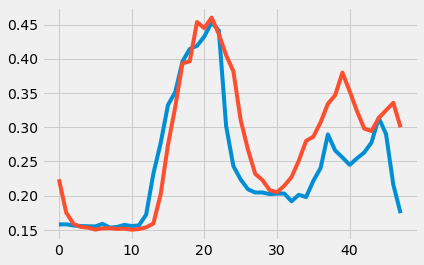

=====

=====
102


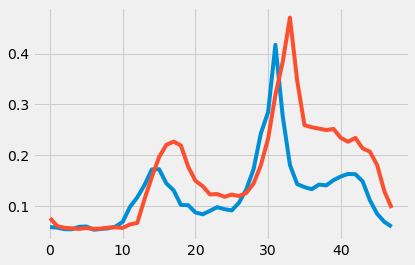

=====

=====
103


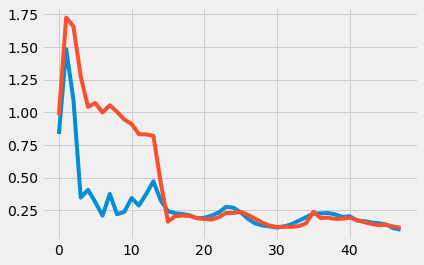

=====

=====
104


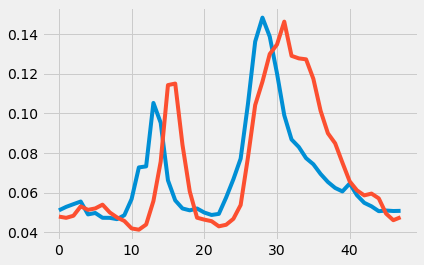

=====

=====
105


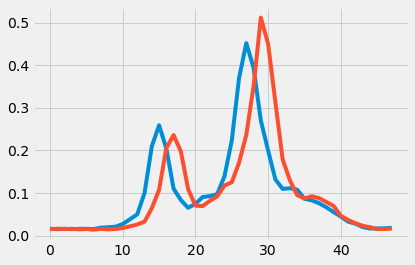

=====

=====
106


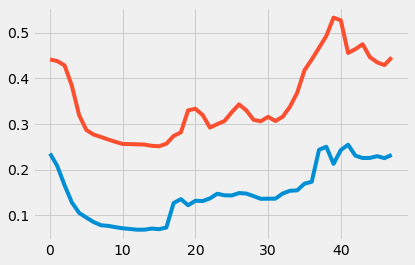

=====

=====
107


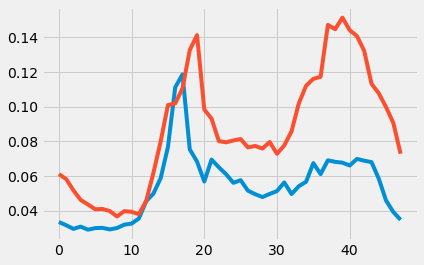

=====

=====
108


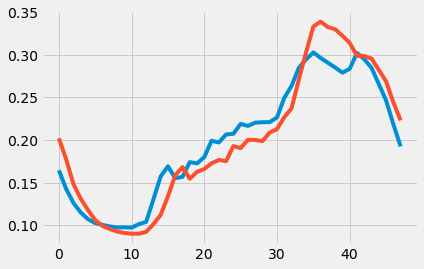

=====

=====
109


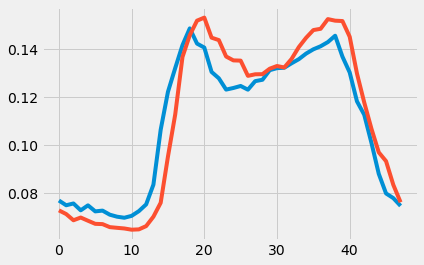

=====

=====
110


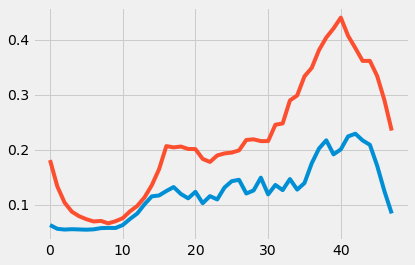

=====

=====
111


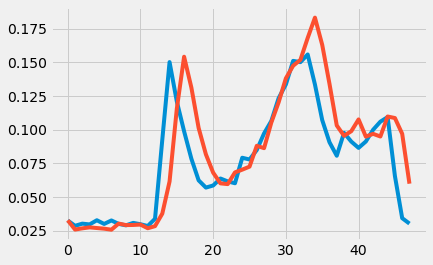

=====



In [24]:
#za sekoe domakjinstvo nivna prosechna potroshuvachka vo zimo i leto
for i in range(len(preprocessed_half_hourly)):
    print('=====')
    print(i)
    plt.plot(averaged_summer[i])
    plt.plot(averaged_winter[i])
    plt.show()
    print('=====\n')



 ===  7  === 


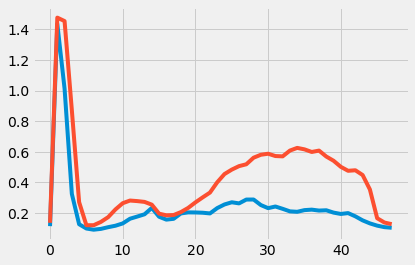



 ===  21  === 


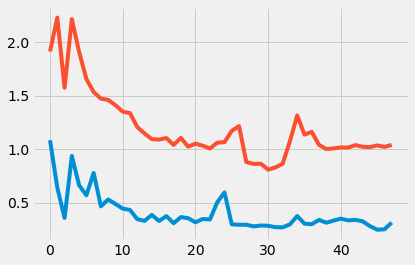



 ===  22  === 


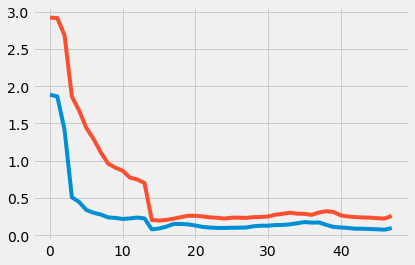



 ===  32  === 


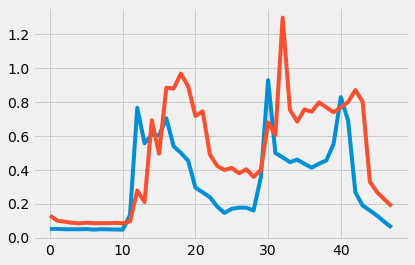



 ===  41  === 


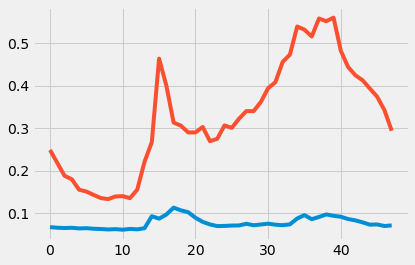



 ===  44  === 


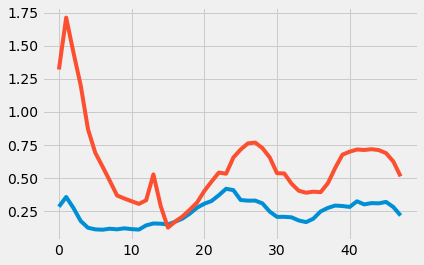



 ===  71  === 


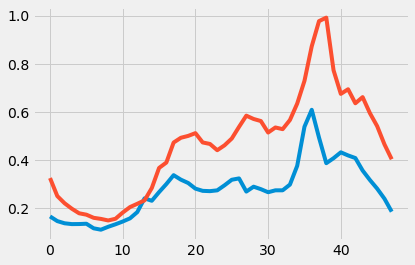



 ===  90  === 


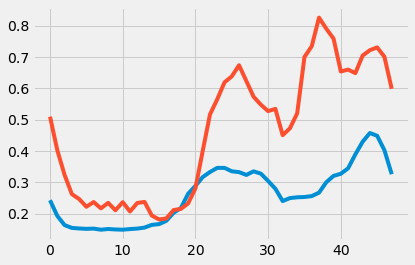



 ===  103  === 


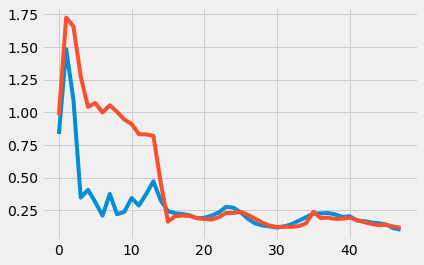



 ===  106  === 


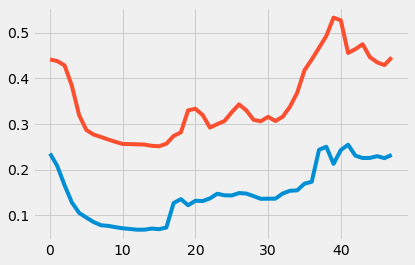

In [25]:
#domakjinstva kaj koi ima golema razlika megju potroshuvachkata vo zima i leto
i=0
for s, w in zip(averaged_summer, averaged_winter):
    if(sum(abs(a-b) for a,b in zip(s,w))>8):
        print('\n\n === ',i, ' === ')
        plt.plot(s)
        plt.plot(w)
    plt.show()
    i=i+1

In [27]:
dataset_daily = dataset_daily()

In [93]:
total_energy_consumption = []
values = []

for i in dataset_daily:
    total = (sum(list(i['energy_sum']))/len(list(i['energy_sum'])))
    if (math.isnan(total) == False):
        total_energy_consumption.append([total])
        values.append(list(i['energy_sum']))
total_energy_consumption = np.array(total_energy_consumption)


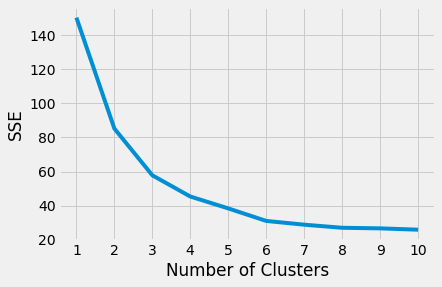

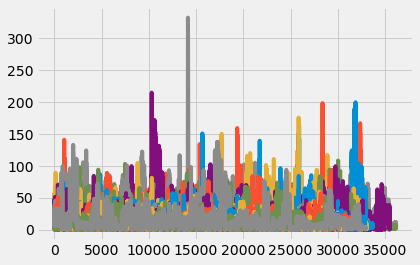

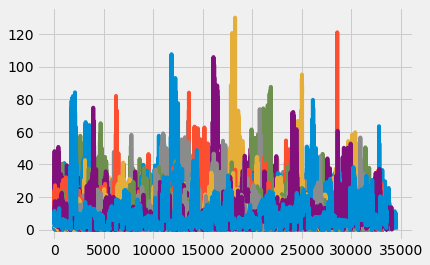

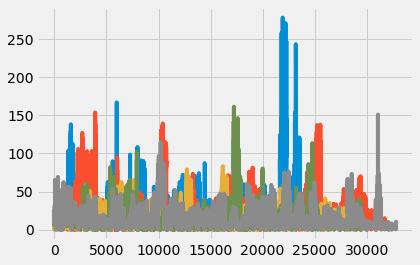

In [116]:
n = optimal_number_of_clusters(total_energy_consumption)
labels = clustering_model(total_energy_consumption, n)
show_clusters(labels, values)